# IE7275 - CART

Note this codes for demonstration purpose in the course IE7275. 

By Yilin Yin and Chun-An Chou

### We demonstrate how to employ CART

In [22]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
# import data about Ownership Prediction
data = pd.read_csv("RidingMowers.csv")
data

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


In [24]:
data.Ownership = data.Ownership.replace('Owner',1)
data.Ownership = data.Ownership.replace('Nonowner',0)

In [25]:
# Impliment CART 
x = data.iloc[:,0:2]
y = data.iloc[:,2]

model = tree.DecisionTreeClassifier(max_depth= 4, random_state=0)
clf = model.fit(x, y)

In [26]:
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)

Classes:  [0 1]
Tree Depth:  4
No. of leaves:  6
No. of features:  2


In [27]:
# Display the CART model
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 59.70
|   |--- feature_1 <= 21.40
|   |   |--- class: 0
|   |--- feature_1 >  21.40
|   |   |--- class: 1
|--- feature_0 >  59.70
|   |--- feature_1 <= 19.80
|   |   |--- feature_0 <= 84.75
|   |   |   |--- feature_0 <= 61.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  61.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  84.75
|   |   |   |--- class: 1
|   |--- feature_1 >  19.80
|   |   |--- class: 1



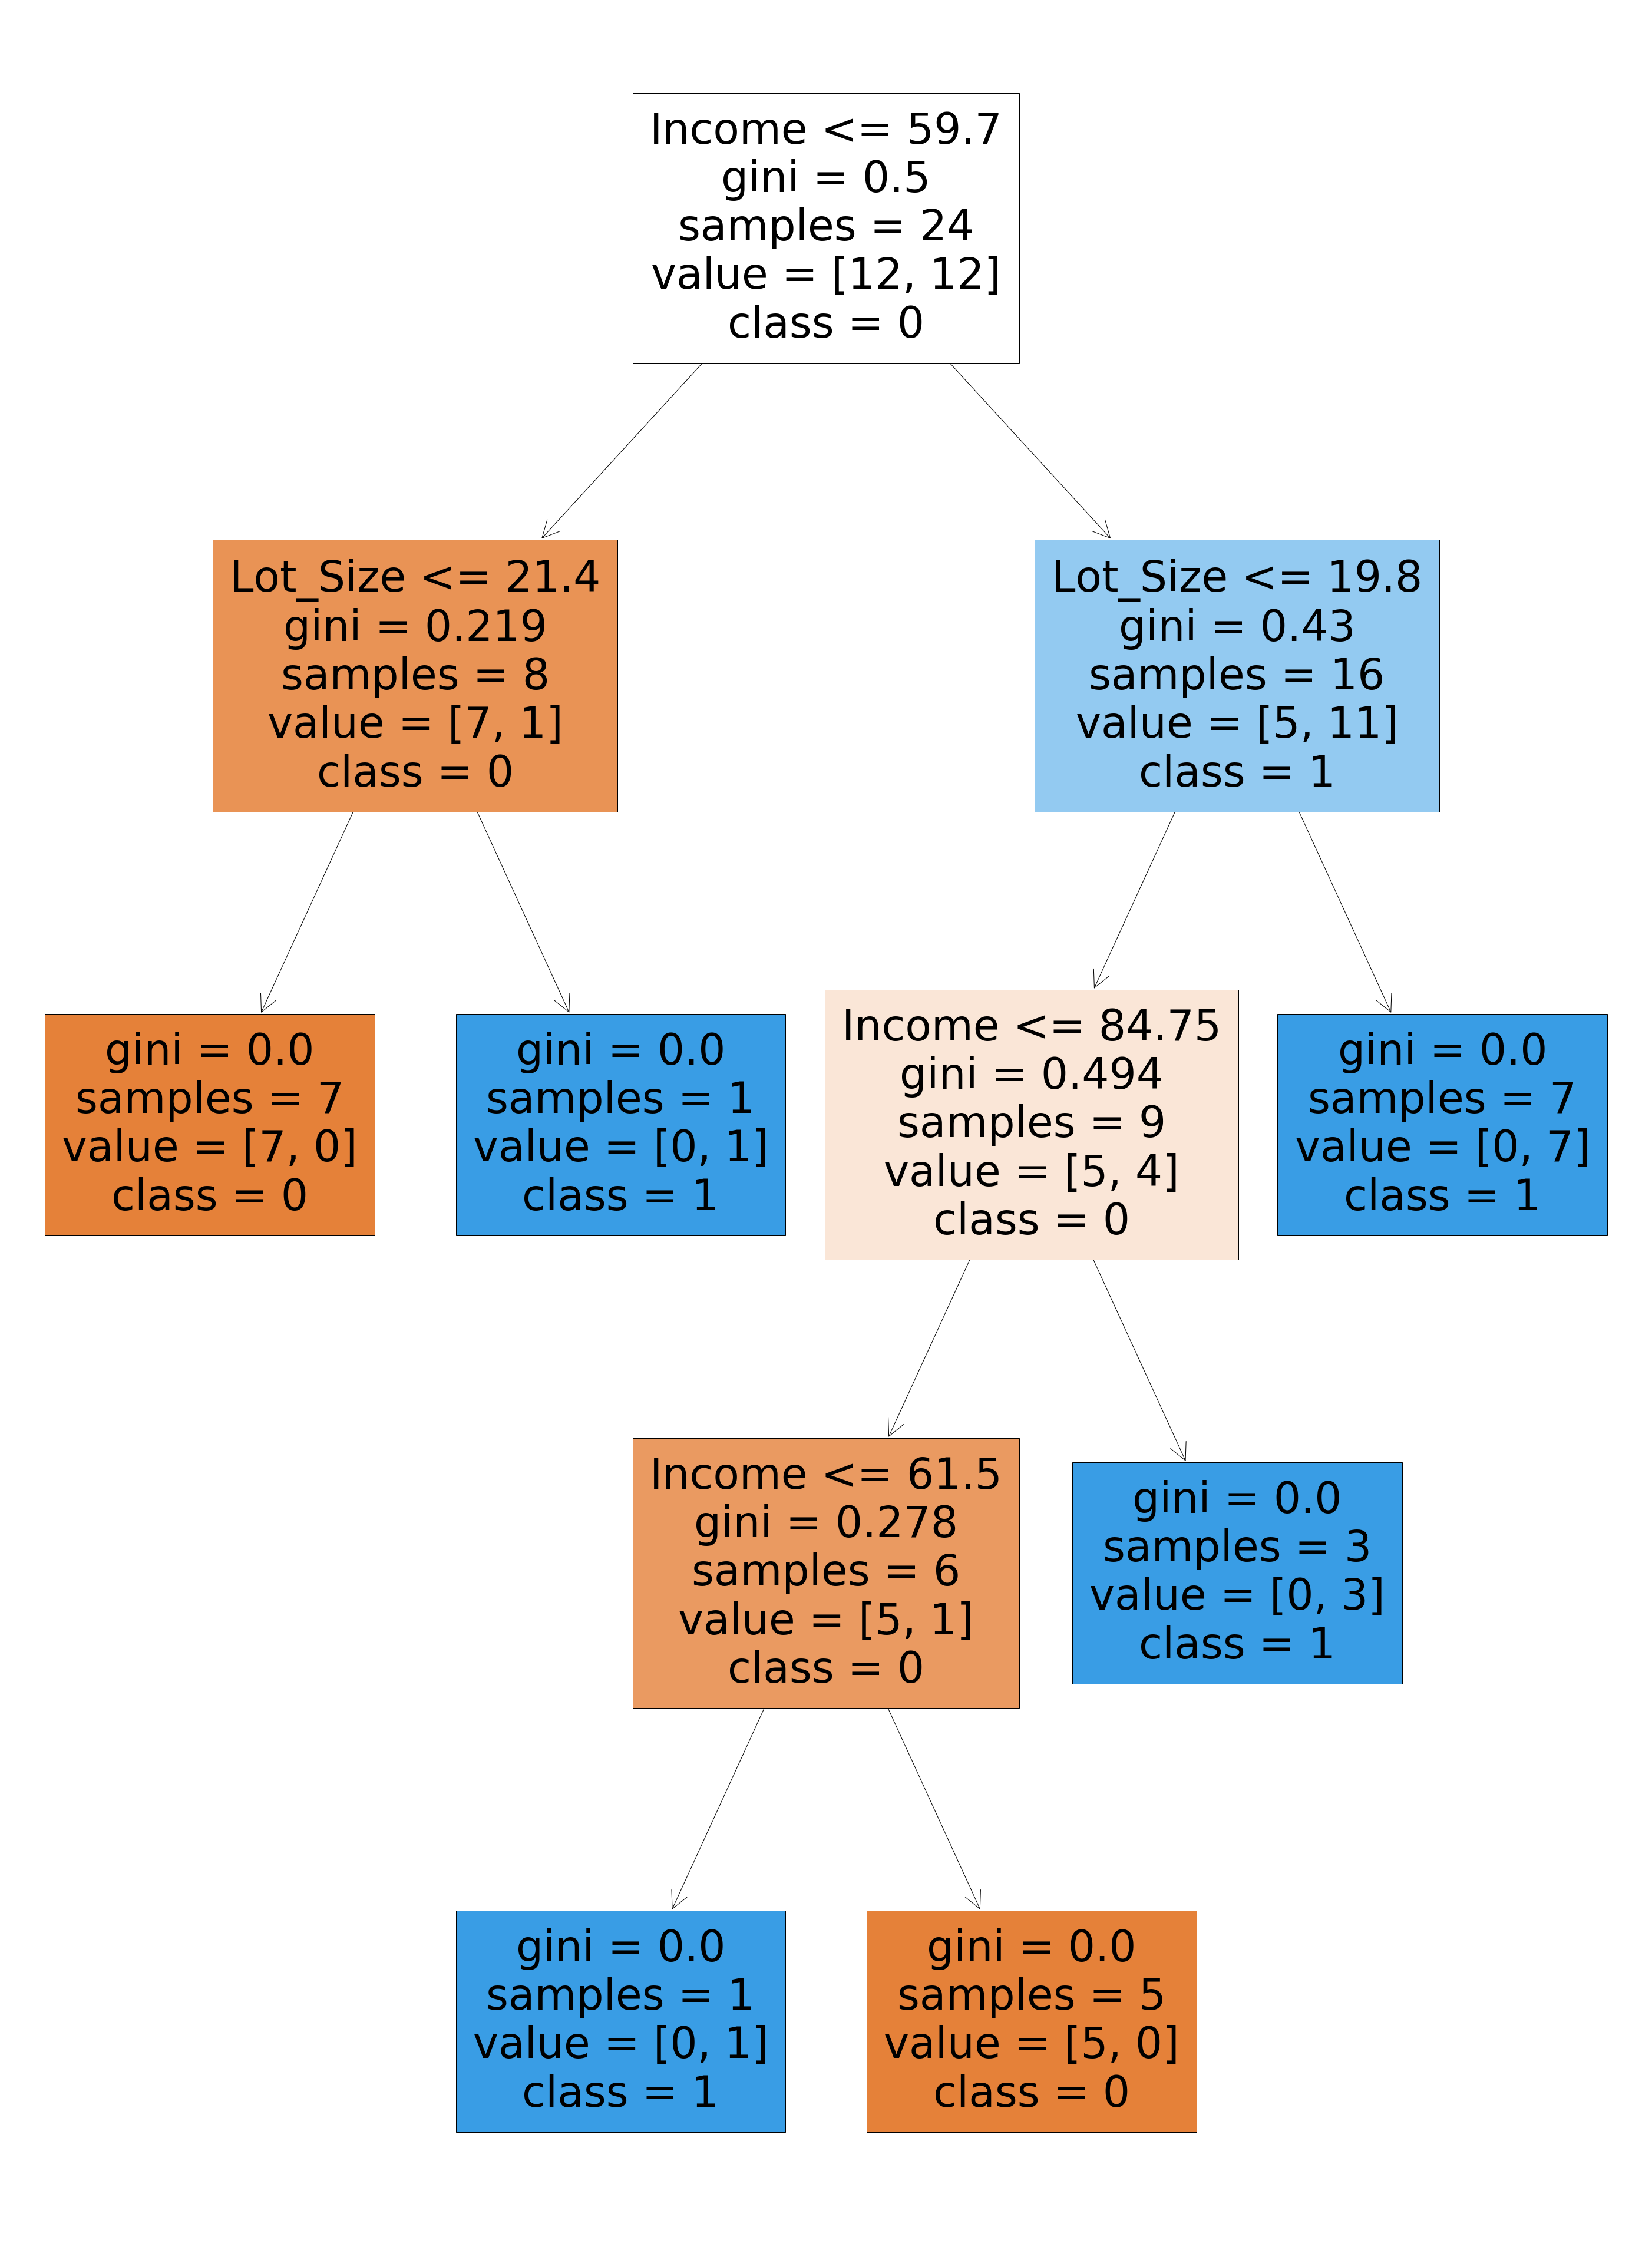

In [28]:
fig = plt.figure(figsize=(50,70))
_ = tree.plot_tree(clf,
                   feature_names=x.columns,
                   class_names =   [str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                   filled=True)

### Cross Validation Demonstration for Iris dataset

In [29]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

In [30]:
# split the data into training and testing subsets
tr_df, test_df,tr_y,test_y = train_test_split(data, y, test_size=0.3)

In [31]:
model = tree.DecisionTreeClassifier(max_depth= 4, random_state=0)
clf = model.fit(tr_df, tr_y)

In [32]:
# Display the CART model
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.85
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



In [33]:
tr_pred = clf.predict(tr_df)
test_pred = clf.predict(test_df)

print(confusion_matrix(tr_y, tr_pred))
print(confusion_matrix(test_y, test_pred))


[[35  0  0]
 [ 0 32  0]
 [ 0  0 38]]
[[15  0  0]
 [ 0 15  3]
 [ 0  0 12]]
